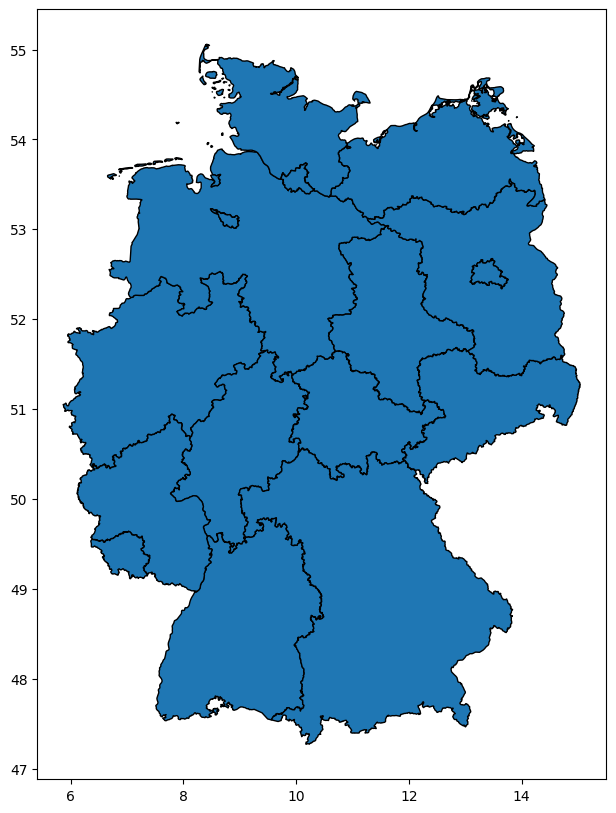

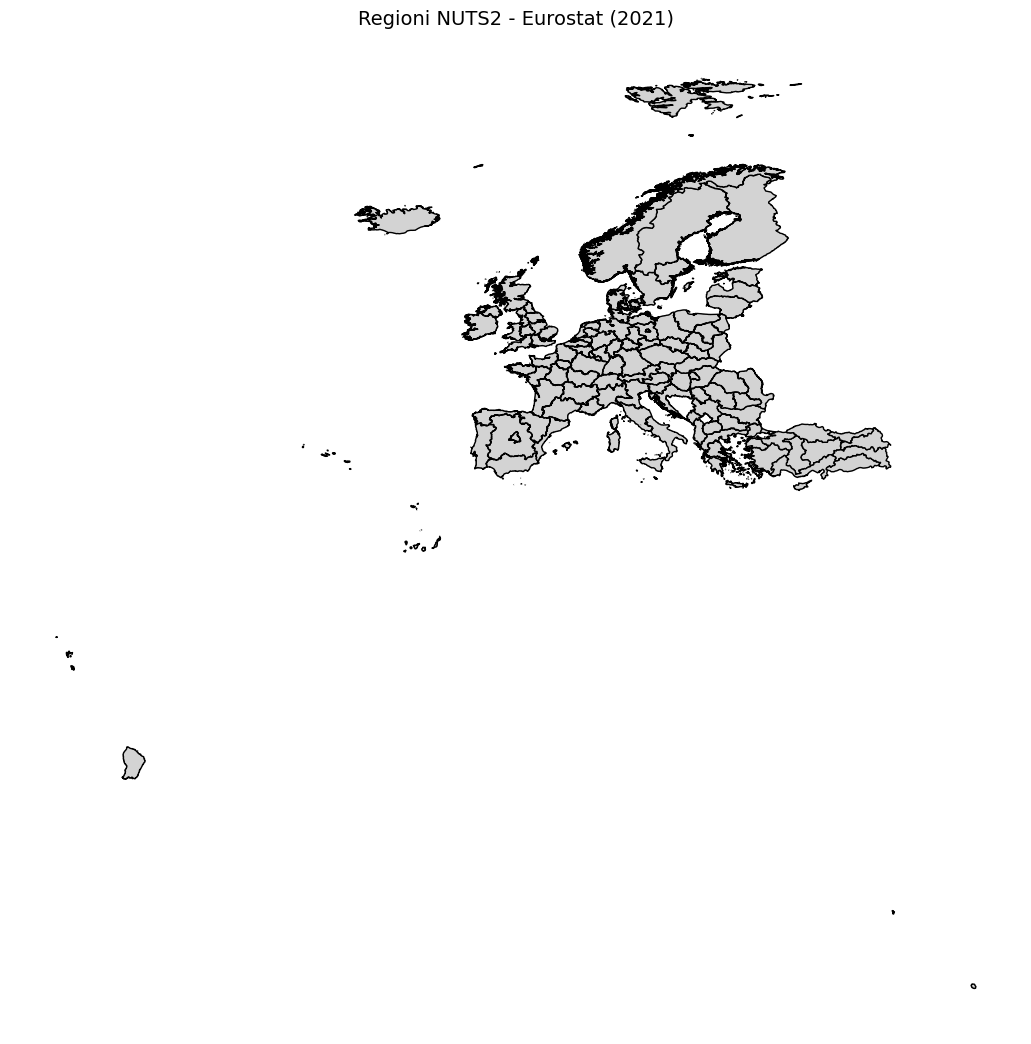

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

# Percorso locale del file già presente
geojson_path = Path("D:/PKM/Github/Eurostat/shapefile/NUTS_RG_01M_2021_4326_LEVL_1.geojson")

# Caricamento del GeoJSON
gdf = gpd.read_file(geojson_path)
gdf_it = gdf[gdf["CNTR_CODE"] == "DE"]
gdf_it.plot(edgecolor="black", figsize=(8, 10))

# Visualizzazione della mappa
fig, ax = plt.subplots(figsize=(16, 13))
gdf.boundary.plot(ax=ax, linewidth=0.1, color="black")
gdf.plot(ax=ax, color="lightgray", edgecolor="black")
plt.title("Regioni NUTS2 - Eurostat (2021)", fontsize=14)
plt.axis("off")
plt.show()


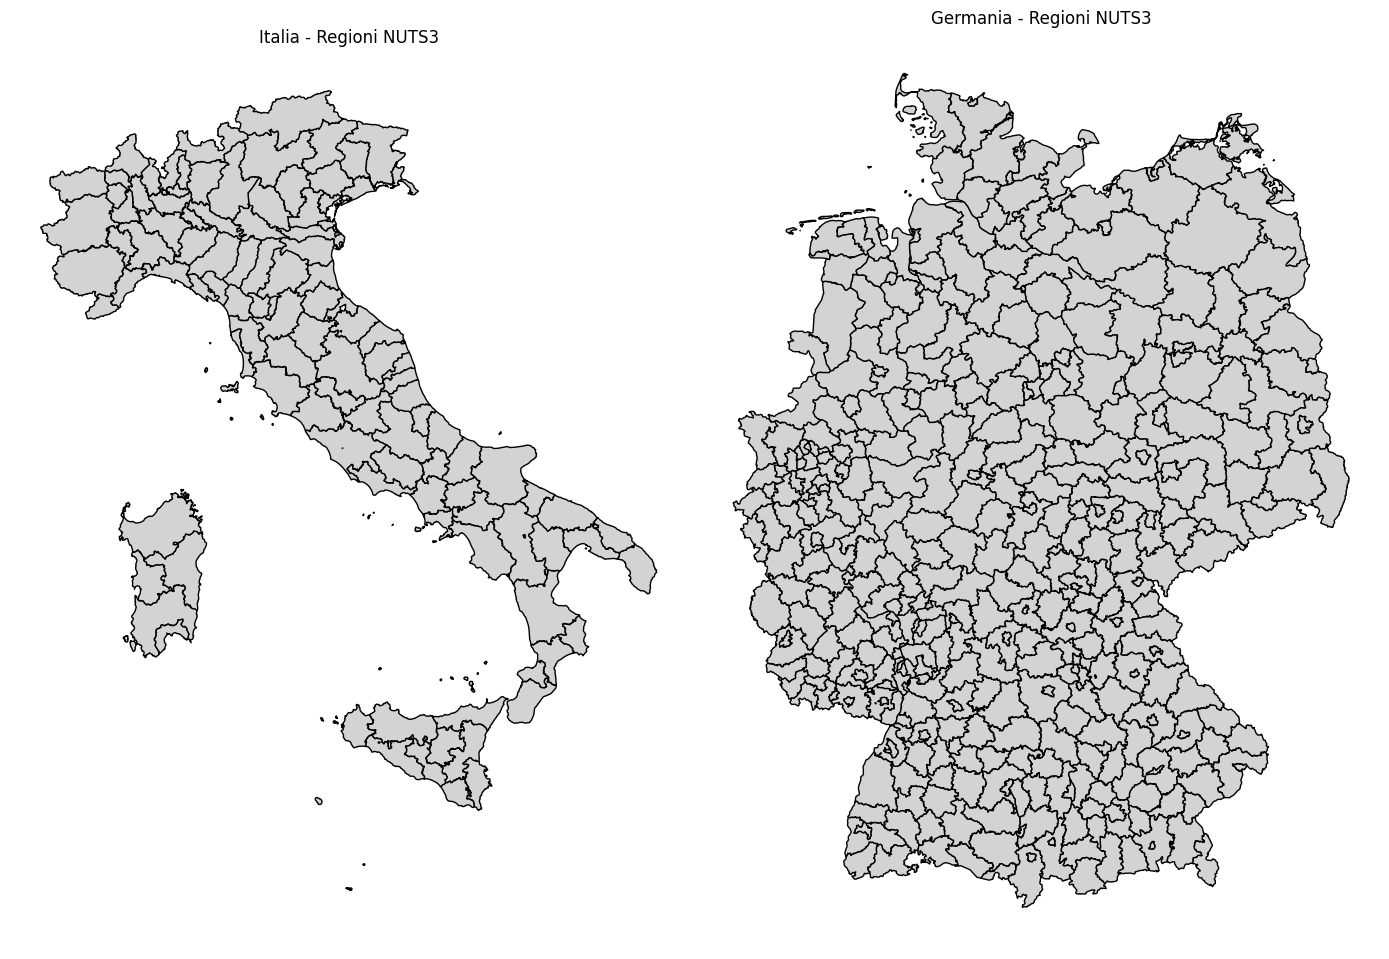

In [14]:
# Filtra solo le regioni NUTS2 di Italia e Germania
gdf_it = gdf[gdf['CNTR_CODE'] == 'IT']
gdf_de = gdf[gdf['CNTR_CODE'] == 'DE']

# Crea un facet plot orizzontale
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# Italia
gdf_it.plot(ax=axes[0], color="lightgray", edgecolor="black")
axes[0].set_title("Italia - Regioni NUTS3")
axes[0].axis("off")

# Germania
gdf_de.plot(ax=axes[1], color="lightgray", edgecolor="black")
axes[1].set_title("Germania - Regioni NUTS3")
axes[1].axis("off")

plt.tight_layout()
plt.savefig('D:/PKM/Github/Eurostat/media/ItDe.png')
plt.show()

<positron-console-cell-20>:42: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
<positron-console-cell-20>:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


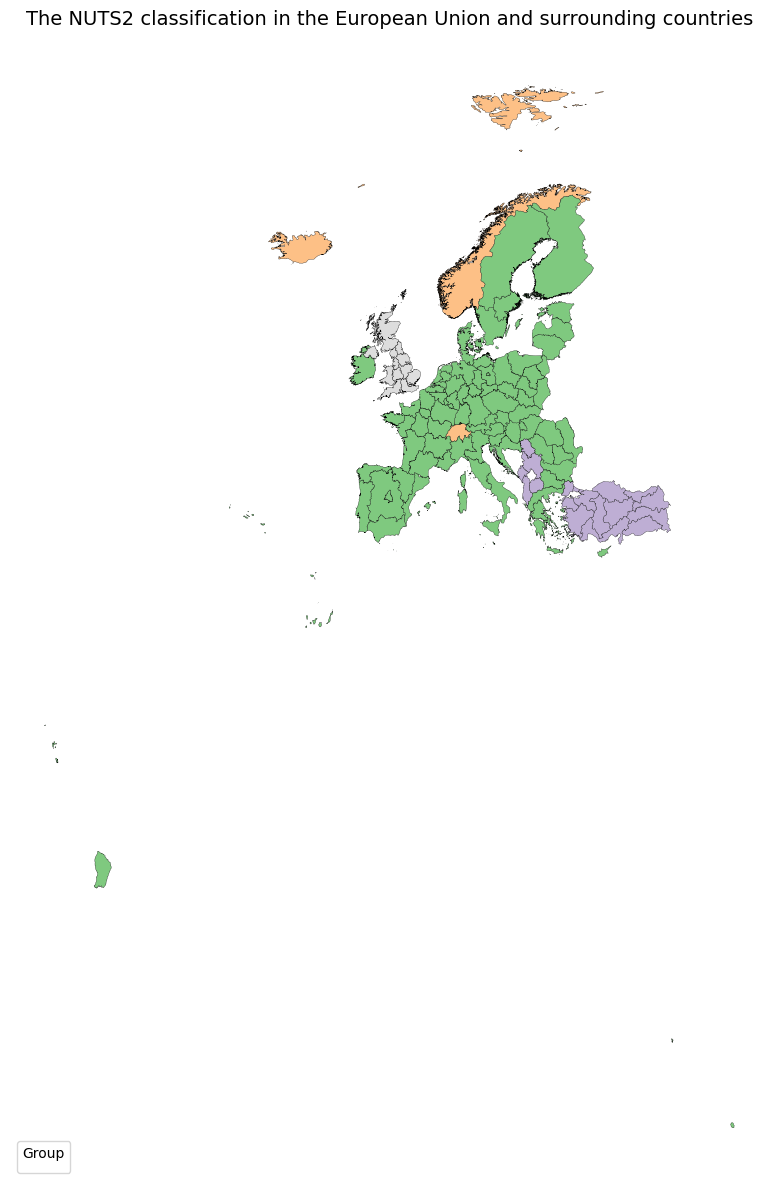

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Colori ufficiali UE per Stati membri, paesi candidati, EFTA
country_groups = {
    "EU27": ["AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR", "DE", "EL", "HU", "IE", "IT",
             "LV", "LT", "LU", "MT", "NL", "PL", "PT", "RO", "SK", "SI", "ES", "SE"],
    "Candidate": ["AL", "BA", "ME", "MK", "RS", "TR", "MD", "UA", "GE", "XK"],
    "EFTA": ["IS", "LI", "NO", "CH"]
}

# Aggiunta colonna per classificazione
def classify_country(code):
    if code in country_groups["EU27"]:
        return "EU27"
    elif code in country_groups["Candidate"]:
        return "Candidate"
    elif code in country_groups["EFTA"]:
        return "EFTA"
    else:
        return "Other"

gdf["GROUP"] = gdf["CNTR_CODE"].apply(classify_country)

# Colori
colors = {
    "EU27": "#7FC97F",       # verde UE
    "Candidate": "#BEAED4",  # viola
    "EFTA": "#FDC086",       # arancio
    "Other": "#DDDDDD"       # grigio chiaro
}

# Plot principale
fig, ax = plt.subplots(figsize=(18, 12))
for group, data in gdf.groupby("GROUP"):
    data.plot(ax=ax, color=colors[group], edgecolor="black", linewidth=0.2, label=group)

ax.set_title("The NUTS2 classification in the European Union and surrounding countries", fontsize=14)
ax.axis("off")
ax.legend(title="Group", loc="lower left")

# Inset: Guiana (FR)
'''guyana = gdf[gdf["NUTS_ID"] == "FRY3"]
axins1 = inset_axes(ax, width="8%", height="12%", loc="upper right", bbox_to_anchor=(-0.1, 0.1, 1, 1), bbox_transform=ax.transAxes)
guyana.plot(ax=axins1, color=colors["EU27"], edgecolor="black")
axins1.set_title("Guyane (FR)", fontsize=8)
axins1.axis("off")'''

# Inset: Canarias (ES)
'''canarias = gdf[gdf["NUTS_ID"].str.startswith("ES70")]
axins2 = inset_axes(ax, width="8%", height="12%", loc="upper right", bbox_to_anchor=(-0.1, 0.25, 1, 1), bbox_transform=ax.transAxes)
canarias.plot(ax=axins2, color=colors["EU27"], edgecolor="black")
axins2.set_title("Canarias (ES)", fontsize=8)
axins2.axis("off")'''

'''# Inset: Açores (PT)
azores = gdf[gdf["NUTS_ID"] == "PT20"]
axins3 = inset_axes(ax, width="8%", height="12%", loc="upper right", bbox_to_anchor=(-0.1, 0.4, 1, 1), bbox_transform=ax.transAxes)
azores.plot(ax=axins3, color=colors["EU27"], edgecolor="black")
axins3.set_title("Açores (PT)", fontsize=8)
axins3.axis("off")

# Inset: Madeira (PT)
madeira = gdf[gdf["NUTS_ID"] == "PT30"]
axins4 = inset_axes(ax, width="8%", height="12%", loc="upper right", bbox_to_anchor=(-0.1, 0.55, 1, 1), bbox_transform=ax.transAxes)
madeira.plot(ax=axins4, color=colors["EU27"], edgecolor="black")
axins4.set_title("Madeira (PT)", fontsize=8)
axins4.axis("off")'''

plt.tight_layout()
plt.show()


In [17]:
guyana = gdf[gdf["NUTS_ID"] == "FRY3"]

if not guyana.empty and guyana.geometry.is_valid.all():
    axins1 = inset_axes(ax, width="8%", height="12%", loc="upper right", 
                        bbox_to_anchor=(-0.1, 0.1, 1, 1), bbox_transform=ax.transAxes)
    guyana.plot(ax=axins1, color=colors["EU27"], edgecolor="black")
    axins1.set_title("Guyane (FR)", fontsize=8)
    axins1.axis("off")
else:
    print("⚠️ Guyana non disponibile o geometria non valida.")


⚠️ Guyana non disponibile o geometria non valida.
